In [1]:
from skimage import data
from skimage.transform import rotate
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load pickled data
import pickle
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
raw_X_train, raw_y_train = train['features'], train['labels']
raw_X_test, raw_y_test = test['features'], test['labels']

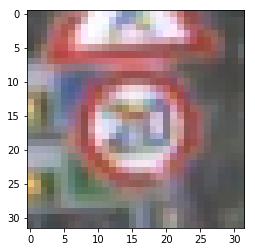

In [3]:
plt.imshow(raw_X_train[0])

## Enlarge the data set using the geometrical symmetries of traffic signs

In [ ]:
### Symmetry in up-and-down direction

In [28]:
def ud_flip(X,y):
    labels=np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35,32,40])
    
    idx=np.in1d(y,labels)
    new_X=X[idx,:,::-1,:]
    new_y=y[idx]
    
    return new_X,new_y,idx

In [ ]:
nX,ny,idx=ud_flip(raw_X_train,raw_y_train)

In [5]:
def lr_flip(X,y):
    labels=np.array([1, 5, 12, 15, 17,32,40])
    idx=np.in1d(y,labels)
    new_X=X[idx,::-1,:,:]
    new_y=y[idx]
    
    return new_X,new_y

In [6]:
def cross_flip(X,y):
        
    flip_pair=[(19, 20), (33, 34), (36, 37), (38, 39), (20, 19), (34, 33), (37, 36), (39, 38)] 
    
    pair_X=[]
    pair_y=[]
    for fp in flip_pair:
        idx_1= y==fp[0]
        idx_2= y==fp[1]
        
        nX_1=X[idx_1,:,::-1,:]
        ny_1=np.ones(nX_1.shape[0])*fp[1]
        
        nX_2=X[idx_2,:,::-1,:]
        ny_2=np.ones(nX_2.shape[0])*fp[0]
        
        pair_X.append(nX_1)
        pair_X.append(nX_2)
        
        pair_y.append(ny_1)
        pair_y.append(ny_2)
        
    return np.concatenate(pair_X,axis=0),np.concatenate(pair_y,axis=0)


In [25]:
import cv2
def rotate_image(image):
    
    rows=image.shape[0]
    cols=image.shape[1]
    
    M = cv2.getRotationMatrix2D((cols/2,rows/2),np.random.uniform(-15,15),1)
    new_image = cv2.warpAffine(image,M,(cols,rows))
    return new_image
    

def batch_rotate(X):
    new_X=np.zeros_like(X)
    for i in range(X.shape[0]):
        new_X[i]=rotate_image(X[i])
    return X

In [26]:
def warp_image(image,move_range=3):

    # get dimensions of image
    rows,cols,ch = image.shape
    # calculate transform

    start_pt = np.float32([[6, 6],[24, 6],[6, 24]])
    transformed_pt=np.zeros_like(start_pt)
    for idx in range(3):
        lr_move=np.random.randint(-move_range,move_range+1)
        ud_move=np.random.randint(-move_range,move_range+1)
        transformed_pt[idx,0]=start_pt[idx,0]+lr_move
        transformed_pt[idx,1]=start_pt[idx,1]+ud_move


    M = cv2.getAffineTransform(start_pt,transformed_pt)
    warped = cv2.warpAffine(image,M,(cols,rows))

    return warped

def batch_warp(X):
    
    nX=np.zeros_like(X)
    for i in range(X.shape[0]):
        nX[i]=warp_image(X[i])
    
    return nX

In [12]:

uX,uy=lr_flip(raw_X_train,raw_y_train)

In [13]:
fpX,fpy=cross_flip(raw_X_train,raw_y_train)

### Warp images
Show 5 randomly warped images.

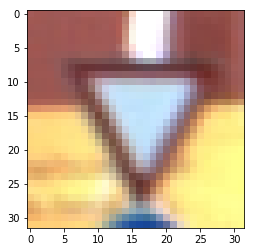

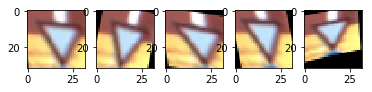

In [18]:
#choose an image
img_id=np.random.randint(raw_y_train.shape[0])
orig_img=raw_X_train[img_id]
plt.imshow(orig_img)
warp_attempt=5
f,ax=plt.subplots(1,warp_attempt)
for i in range(warp_attempt):
    ax[i].imshow(warp_image(orig_img))

In [20]:
total_warp_copy=3

X_list=[]
y_list=[]
for i in range(total_warp_copy):
    afX=batch_warp(raw_X_train)
    afy=raw_y_train
    X_list.append(afX)
    y_list.append(afy)

afX=np.concatenate(X_list,axis=0)
afy=np.concatenate(y_list,axis=0)

## Rotate images

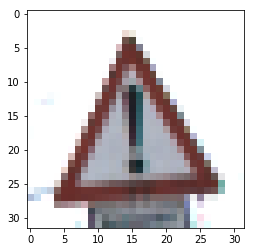

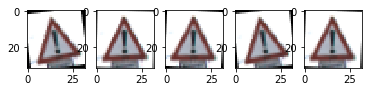

In [27]:
#choose an image
img_id=np.random.randint(raw_y_train.shape[0])
orig_img=raw_X_train[img_id]
plt.imshow(orig_img)
rotate_attempt=5
f,ax=plt.subplots(1,rotate_attempt)
for i in range(rotate_attempt):
    ax[i].imshow(rotate_image(orig_img))

In [21]:
import copy
rX=batch_rotate(copy.copy(raw_X_train))
ry=raw_y_train
assert rX.shape[0]==ry.shape[0]

## Write all the results into a file

In [24]:
aug_train={}
aug_train['horiz_sym_features']=nX
aug_train['horiz_sym_labels']=ny
aug_train['vert_sym_features']=uX
aug_train['vert_sym_labels']=uy
aug_train['fp_features']=fpX
aug_train['fp_labels']=fpy
aug_train['rotate_features']=rX
aug_train['rotate_lables']=ry
aug_train['affine_features']=afX
aug_train['affine_labels']=afy
aug_training_file="./traffic-signs-data/aug_train.p"
with open(aug_training_file, mode='wb') as f:
    pickle.dump(aug_train,f)